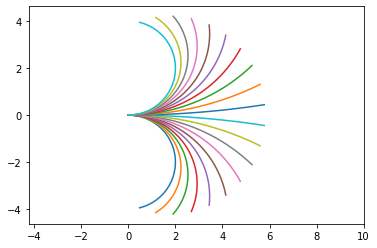

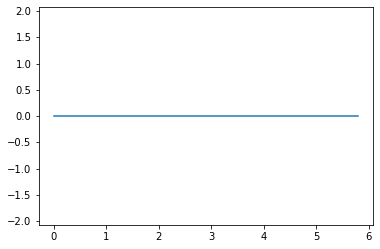

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def move_one_step(s_t, v, w, n):
    if np.abs(w) > 1e-14:
        sign_w = np.abs(w)/w
        r = v/np.abs(w)
        arc_x = s_t[0] + r*np.cos(s_t[2]+sign_w*np.pi/2.0)
        arc_y = s_t[1] + r*np.sin(s_t[2]+sign_w*np.pi/2.0)
        angle1 = s_t[2] - sign_w*np.pi/2.0 + w*dt*n
        x = arc_x + r*np.cos(angle1)
        y = arc_y + r*np.sin(angle1) 
        theta = s_t[2] + w*dt*n
        return [x, y, theta]
    else:
        return [s_t[0]+n*dt*v*np.cos(s_t[2]), s_t[1]+n*dt*v*np.sin(s_t[2]), s_t[2]]
    
def generate_path(s_t, v, w, n):
    path = []
    for i in range(n):
        x, y, theta = move_one_step(s_t, v, w, i)
        path.append([x, y])
    return path

s_t = [0.0, 0.0, 0.0]
v = 2.0
w_arr = np.linspace(-1, 1, 20)
dt = 0.1
for w in w_arr:
    path = generate_path(s_t, v, w, 30)
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1])
plt.axis("equal")
plt.show()    
path = generate_path(s_t, v, 1e-16, 30)
path = np.array(path)
plt.plot(path[:, 0], path[:, 1])    
plt.axis("equal")
plt.show()

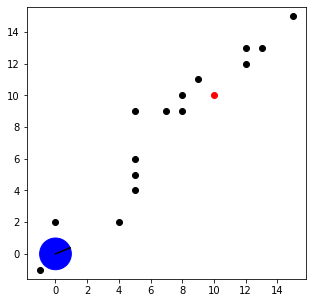

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def plot_robot(x, y, yaw, robot_radius):  # pragma: no cover
    circle = plt.Circle((x, y), robot_radius, color="b")
    plt.gcf().gca().add_artist(circle)
    out_x, out_y = (np.array([x, y]) +
                    np.array([np.cos(yaw), np.sin(yaw)]) * robot_radius)
    plt.plot([x, out_x], [y, out_y], "-k")

robot = np.array([0.0, 0.0, math.pi / 8.0, 0.0, 0.0])
robot_radius = 1.0
goal = np.array([10.0, 10.0])
ob = np.array([[-1, -1],
            [0, 2],
            [4.0, 2.0],
            [5.0, 4.0],
            [5.0, 5.0],
            [5.0, 6.0],
            [5.0, 9.0],
            [8.0, 9.0],
            [7.0, 9.0],
            [8.0, 10.0],
            [9.0, 11.0],
            [12.0, 13.0],
            [12.0, 12.0],
            [15.0, 15.0],
            [13.0, 13.0]
            ])
plt.figure(figsize=(5,5)) 
plt.plot(ob[:, 0], ob[:, 1], "ok")
plt.scatter(goal[0], goal[1], color='red')
plot_robot(robot[0], robot[1], robot[2], robot_radius)
plt.axis('equal')    
plt.show()

In [3]:
v_min = 0
v_max = 0.9
w_min = -np.pi/2.0
w_max = np.pi/2.0

dv_max = 0.5
dw_max = np.pi/3.0

dt = 0.1
v_a = 0.4
w_a = 0.0

Vs = [[v_min, v_max], [w_min, w_max]]

def Vr(v, w):
    Vd = [[v-dv_max*dt, v+dv_max*dt], [w-dw_max*dt, w+dw_max*dt]]
    return [[max(Vs[0][0], Vd[0][0]), min(Vs[0][1], Vd[0][1])], 
            [max(Vs[1][0], Vd[1][0]), min(Vs[1][1], Vd[1][1])]]

Vr = Vr(v_a, w_a)

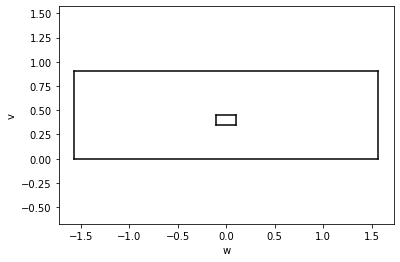

In [4]:
def plot_area(V):
    plt.plot([V[1][0], V[1][1]], [V[0][0], V[0][0]], 'k')
    plt.plot([V[1][1], V[1][1]], [V[0][0], V[0][1]], 'k')
    plt.plot([V[1][1], V[1][0]], [V[0][1], V[0][1]], 'k')
    plt.plot([V[1][0], V[1][0]], [V[0][1], V[0][0]], 'k')
plot_area(Vs)
plot_area(Vr)
plt.axis("equal")
plt.ylabel("v")
plt.xlabel("w")
plt.show()

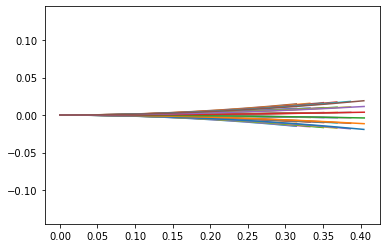

In [5]:
N_v = 6
N_w = 6

s_t = [0.0, 0.0, 0.0]
v_samples = np.linspace(Vr[0][0], Vr[0][1], N_v)
w_samples = np.linspace(Vr[1][0], Vr[1][1], N_w)
for v in v_samples:
    for w in w_samples:
        path = generate_path(s_t, v, w, 10)
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1])
plt.axis("equal")
plt.show()

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

def plot_robot(x, y, yaw, robot_radius):  # pragma: no cover
    circle = plt.Circle((x, y), robot_radius, color="b")
    plt.gcf().gca().add_artist(circle)
    out_x, out_y = (np.array([x, y]) +
                    np.array([np.cos(yaw), np.sin(yaw)]) * robot_radius)
    plt.plot([x, out_x], [y, out_y], "-k")

robot = np.array([0.0, 0.0, math.pi / 8.0, 0.0, 0.0])
robot_radius = 1.0
goal = np.array([10.0, 10.0])
ob = np.array([[-1, -1],
            [0, 2],
            [4.0, 2.0],
            [5.0, 4.0],
            [5.0, 5.0],
            [5.0, 6.0],
            [5.0, 9.0],
            [8.0, 9.0],
            [7.0, 9.0],
            [8.0, 10.0],
            [9.0, 11.0],
            [12.0, 13.0],
            [12.0, 12.0],
            [15.0, 15.0],
            [13.0, 13.0]
            ])

N_v = 6
N_w = 10
v_min = 0
v_max = 0.9
w_min = -2*np.pi/3.0
w_max = 2*np.pi/3.0

dv_max = 0.5
dw_max = np.pi/2.0

dt = 0.1
n = 30

Vs = [[v_min, v_max], [w_min, w_max]]

def Vr_calculate(v, w):
    Vd = [[v-dv_max*dt, v+dv_max*dt], [w-dw_max*dt, w+dw_max*dt]]
    return [[max(Vs[0][0], Vd[0][0]), min(Vs[0][1], Vd[0][1])], 
            [max(Vs[1][0], Vd[1][0]), min(Vs[1][1], Vd[1][1])]]


def calculate_cost(s_t, v, w):
    # goal
    x, y, theta = move_one_step(s_t, v, w, n)      
    dx = goal[0] - x
    dy = goal[1] - y
    error_angle = math.atan2(dy, dx)
    cost_angle = error_angle - theta
    C_goal = abs(math.atan2(math.sin(cost_angle), math.cos(cost_angle)))
    # safe
    trajectory = generate_path(s_t, v, w, n)
    trajectory = np.array(trajectory)       
    C_safe = calc_obstacle_cost(trajectory, ob, robot_radius)
    # speed
    C_speed = v_max - v
    return 0.15*C_goal+C_safe+C_speed

def move_one_step(s_t, v, w, n):
    if np.abs(w) > 1e-14:
        sign_w = np.abs(w)/w
        r = v/np.abs(w)
        arc_x = s_t[0] + r*np.cos(s_t[2]+sign_w*np.pi/2.0)
        arc_y = s_t[1] + r*np.sin(s_t[2]+sign_w*np.pi/2.0)
        angle1 = s_t[2] - sign_w*np.pi/2.0 + w*dt*n
        x = arc_x + r*np.cos(angle1)
        y = arc_y + r*np.sin(angle1) 
        theta = s_t[2] + w*dt*n
        return [x, y, theta]
    else:
        return [s_t[0]+n*dt*v*np.cos(s_t[2]), s_t[1]+n*dt*v*np.sin(s_t[2]), s_t[2]]

def generate_path(s_t, v, w, n):
    trajectory = []
    for i in range(n):
        x, y, theta = move_one_step(s_t, v, w, i)
        trajectory.append([x, y])
    return trajectory   
    
def calc_obstacle_cost(trajectory, ob, robot_radius):
    ox = ob[:, 0]
    oy = ob[:, 1]
    dx = trajectory[:, 0] - ox[:, None]
    dy = trajectory[:, 1] - oy[:, None]
    r = np.hypot(dx, dy)    
    if np.array(r <= robot_radius).any():
        return float("Inf")
    min_r = np.min(r)
    return 1.0 / min_r  # OK    
    
    
def is_goal_reached(x, y):
    dx = x - goal[0]
    dy = y - goal[1]
    if np.sqrt(dx*dx+dy*dy) < 0.5:
        return True
    return False

now_state = robot
path = []
for i in range(30000):
    path.append([now_state[0], now_state[1], now_state[2], now_state[3], now_state[4]])
    s_t = [now_state[0], now_state[1], now_state[2]]
#     print("s_t:", s_t)
    Vr = Vr_calculate(now_state[3], now_state[4])
    v_samples = np.linspace(Vr[0][0], Vr[0][1], N_v)
    w_samples = np.linspace(Vr[1][0], Vr[1][1], N_w)
    candidate_vw = []
    cost_vw = []            
    for v in v_samples:
        for w in w_samples: 
            candidate_vw.append([v, w])
            cost_vw.append(calculate_cost(s_t, v, w))               
                
    if len(candidate_vw) > 0:
        opt_idx = cost_vw.index(min(cost_vw))
        v, w = candidate_vw[opt_idx]
#         print("v, w:", v, w)
        s_t1 = move_one_step(s_t, v, w, 1)
#         print("s_t1:", s_t1)
        now_state = np.array([s_t1[0], s_t1[1], s_t1[2], v, w])
    else: 
        print(i)
        break
                          
    if is_goal_reached(now_state[0], now_state[1]):
        print("reach goal success")
        break           

reach goal success


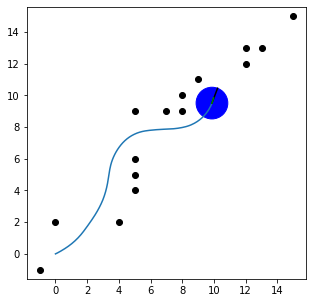

<Figure size 432x288 with 0 Axes>

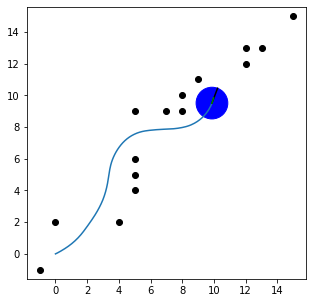

In [9]:
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
plt.figure(2)

plt.figure(figsize=(5,5)) 

for state in path:
    plt.clf()
    plt.plot(ob[:, 0], ob[:, 1], "ok")
    plt.scatter(goal[0], goal[1], color='red')
    plt.plot(np.array(path)[:,0], np.array(path)[:,1])    
    s_t = [state[0], state[1], state[2]]
    plot_robot(state[0], state[1], state[2], robot_radius)
    trajectory = generate_path(s_t, state[3], state[4], n)
    trajectory = np.array(trajectory) 
    plt.plot(trajectory[:,0], trajectory[:,1], 'green')
    plt.axis('equal') 
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())     